# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [80]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [3]:
adv = pd.read_csv('E:/Refactored_Py_DS_ML_Bootcamp-master/13-Logistic-Regression/advertising.csv')

**Check the head of ad_data**

In [4]:
adv.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


**Use info and describe() on ad_data**

In [5]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [7]:
adv.describe().round(2)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.0
mean,65.00,36.01,55000.00,180.00,0.48,0.5
std,15.85,8.79,13414.63,43.90,0.50,0.5
min,32.60,19.00,13996.50,104.78,0.00,0.0
25%,51.36,29.00,47031.80,138.83,0.00,0.0
50%,68.22,35.00,57012.30,183.13,0.00,0.5
75%,78.55,42.00,65470.63,218.79,1.00,1.0
max,91.43,61.00,79484.80,269.96,1.00,1.0


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

**Create a histogram of the Age**

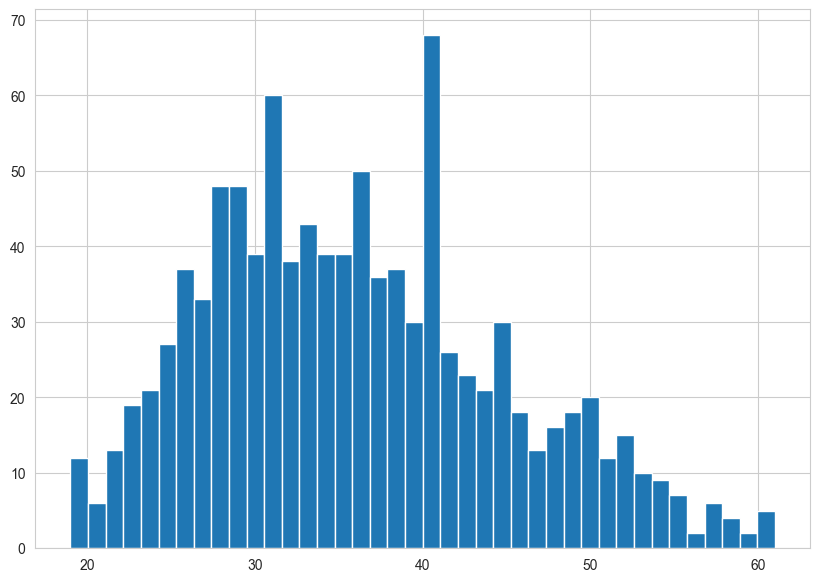

In [18]:
adv['Age'].hist(bins=40,figsize=(10,7))

plt.show()

**Create a jointplot showing Area Income versus Age.**

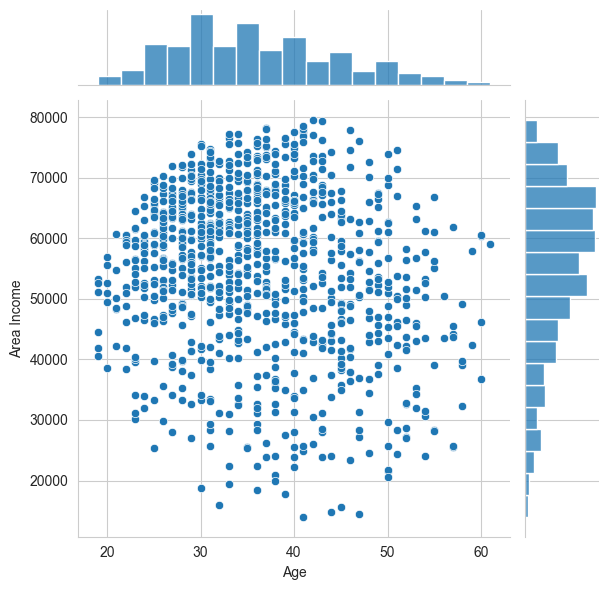

In [20]:
sns.jointplot(data=adv,x=adv['Age'],y=adv['Area Income'])

plt.show()

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

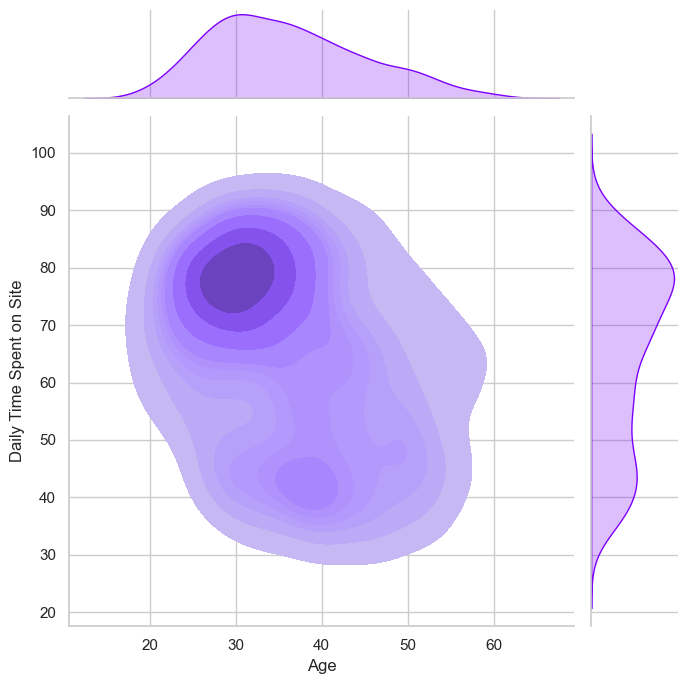

In [45]:
sns.jointplot(data=adv,x=adv['Age'],
              y=adv['Daily Time Spent on Site'],
              kind='kde',
              fill=True,
              color='#7C00FE',
              height=7,
              ratio=5)

plt.show()

**Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

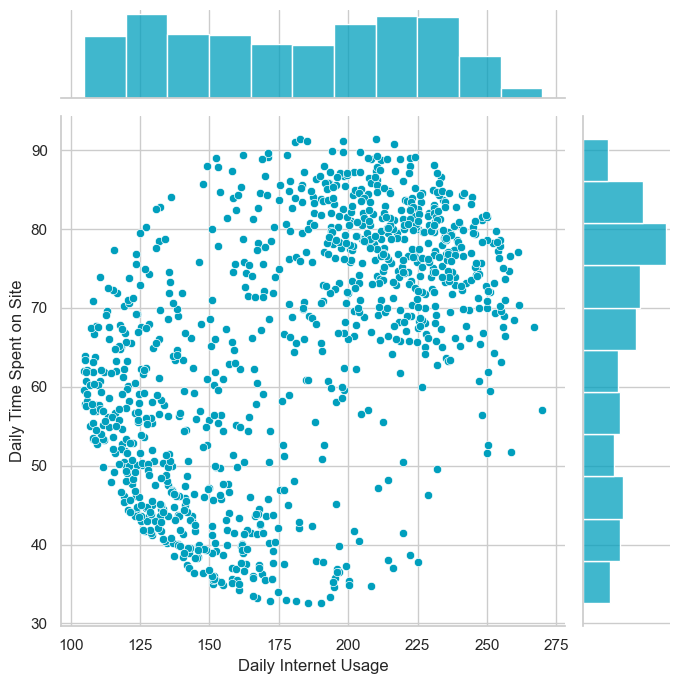

In [48]:
sns.jointplot(data=adv,x=adv['Daily Internet Usage'],
              y=adv['Daily Time Spent on Site'],
              kind='scatter',
              color='#009FBD',
              height=7,
              ratio=5)

plt.show()

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

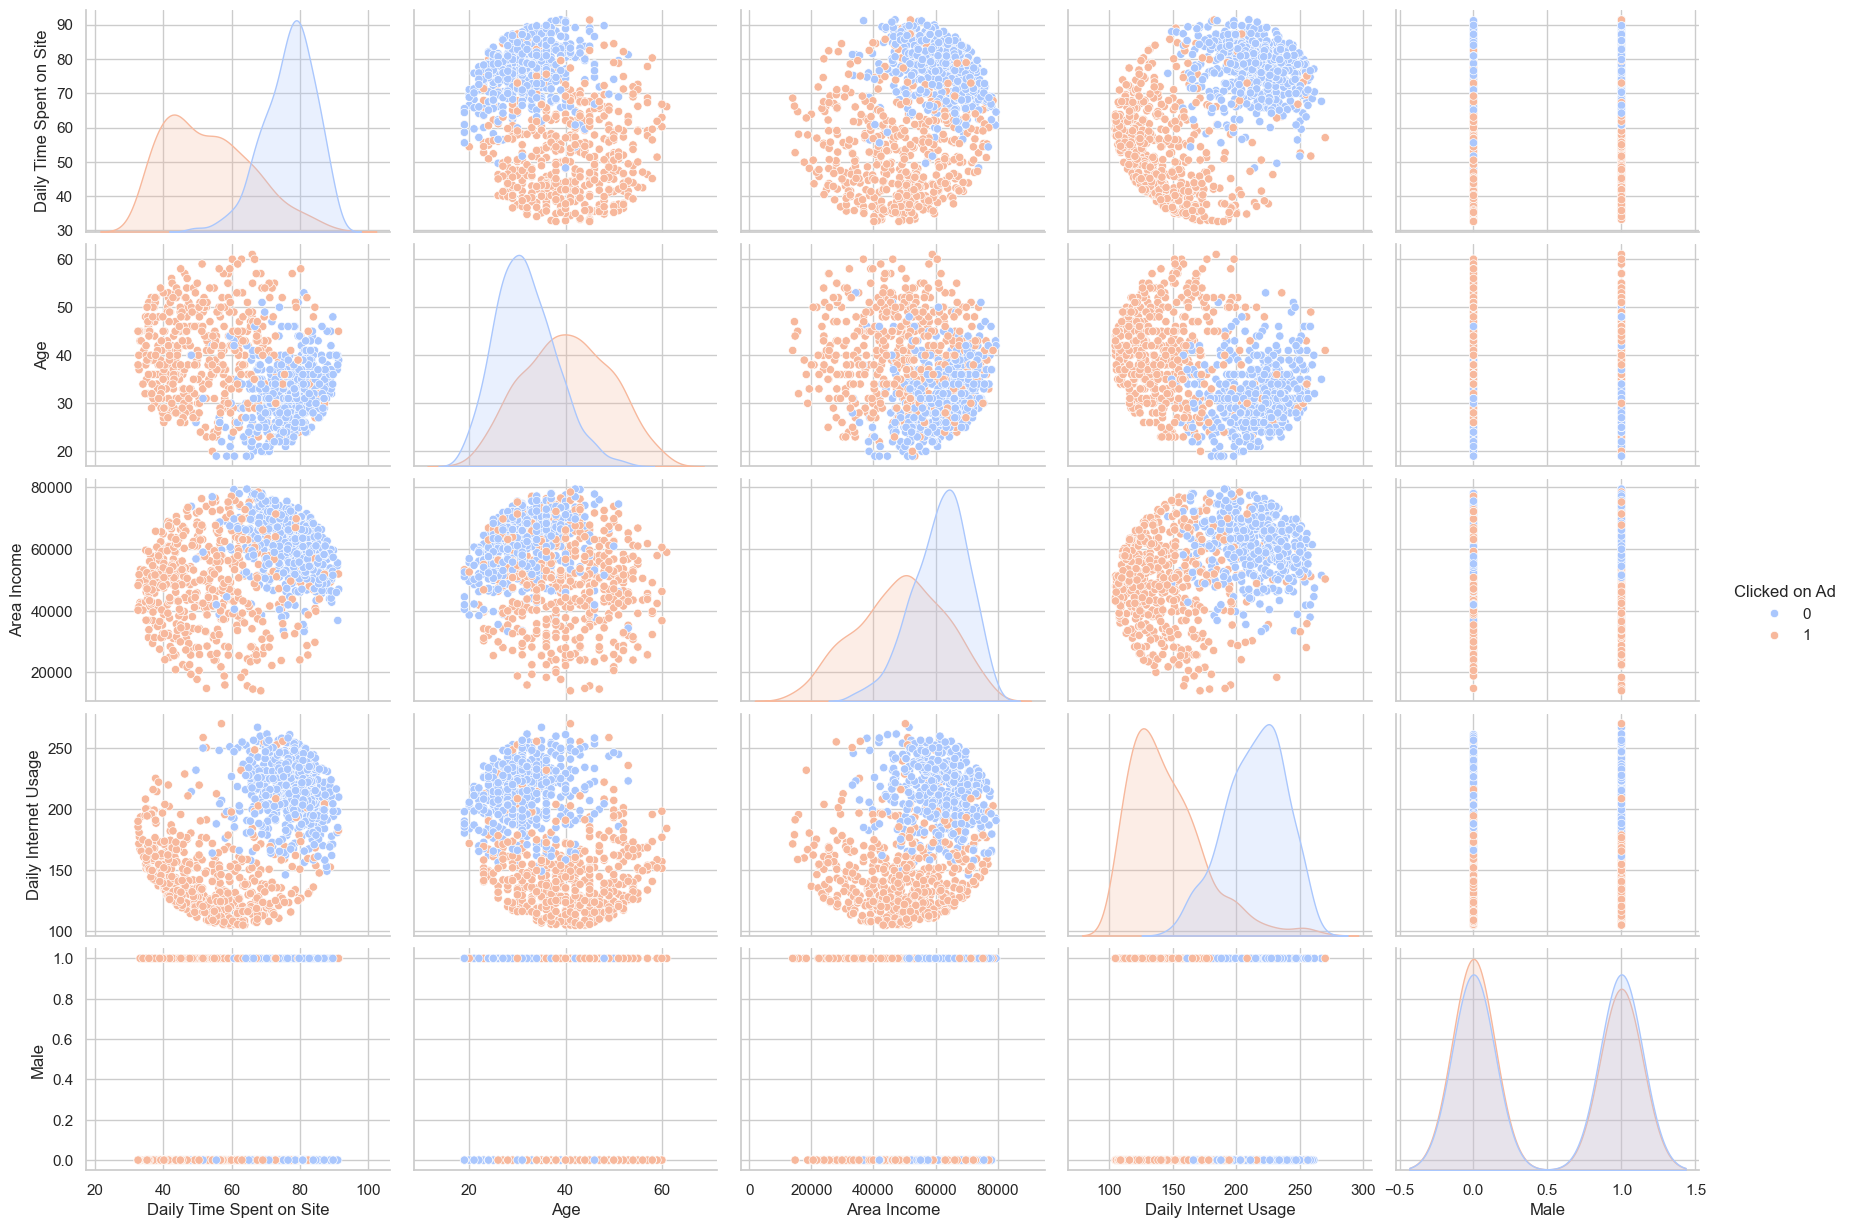

In [55]:
sns.pairplot(data=adv,
             hue='Clicked on Ad',
             palette='coolwarm',
             aspect=1.4)

plt.show()

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

**Split the data into training set and testing set using train_test_split**

In [63]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [94]:
x = adv.drop(['Clicked on Ad','Ad Topic Line','City','Country','Timestamp'],axis=1)

y = adv['Clicked on Ad']

In [113]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=90)

**Train and fit a logistic regression model on the training set.**

In [114]:
lg = LogisticRegression()

In [115]:
lg.fit(X_train,y_train)

c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Predictions and Evaluations
**Now predict values for the testing data.**

In [116]:
predictions = lg.predict(X_test)

**Create a classification report for the model.**

In [117]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       154
           1       0.96      0.88      0.92       146

    accuracy                           0.92       300
   macro avg       0.93      0.92      0.92       300
weighted avg       0.93      0.92      0.92       300



In [112]:
print(confusion_matrix(y_test,predictions))

[[150   9]
 [ 19 122]]
